# <center>ANN Implementation Breast Cancer

In [1]:
from __future__ import print_function
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output
from keras.utils import plot_model

c:\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
c:\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("data.csv")
data.head()
data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
print("Row, Col", data.shape)# (row,col)

Row, Col (569, 31)


In [6]:
(data['diagnosis'][:398]==1).sum(),(data['diagnosis'][:398]==0).sum()

(173, 225)

In [7]:
(data['diagnosis'][398:]==1).sum(),(data['diagnosis'][398:]==0).sum()

(39, 132)

In [8]:
mat=data.as_matrix()
mat.shape
mat

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 0.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

## Model training

### Using 2 Sigmoid Layers and RMSprop optimizer

In [9]:
model2 = Sequential()
model2.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model2.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history01 = model2.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128,verbose=0)

In [10]:
score = model2.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.022179495707626954
Train accuracy: 0.9874371859296482


In [11]:
score = model2.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.20416448443953755
Validation accuracy: 0.9473684154755888


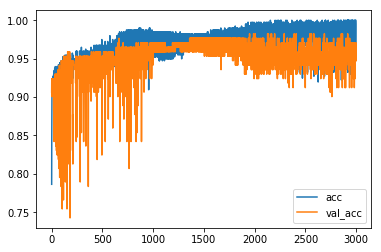

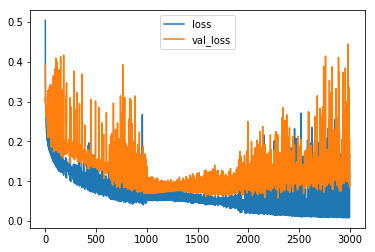

651


In [12]:
plt.plot(history01.history['acc'], label='acc')
plt.plot(history01.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.plot(history01.history['loss'], label='loss')
plt.plot(history01.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history01.history['acc']:
    if i>0.99:
        count+=1
print(count)

In [13]:
model2.save('model2.h5')
print("Avg Training acc: ", np.mean(history01.history['acc']),"\nAvg Testing acc: ", np.mean(history01.history['val_acc']))

Avg Training acc:  0.9736608039294458 
Avg Testing acc:  0.9484600363219226


### Using 3 Sigmoid Layers and RMSprop optimizer

In [14]:
model3 = Sequential()
model3.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model3.add(Dense(500, activation='sigmoid', use_bias=True))
model3.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history0 = model3.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128, verbose=0)

In [142]:
score2 = model3.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score2[0])
print('Train accuracy:', score2[1])

Train loss: 0.0216649695146
Train accuracy: 0.992462311558


In [143]:
score2 = model3.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score2[0])
print('Validation accuracy:', score2[1])

Validation loss: 0.0705424946629
Validation accuracy: 0.970760233918


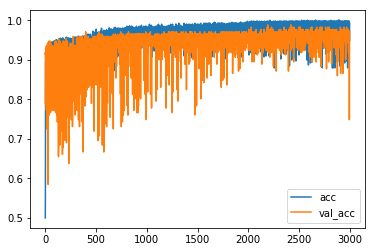

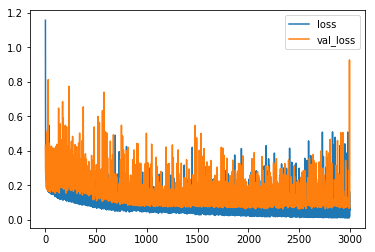

629


In [141]:
plt.plot(history0.history['acc'], label='acc')
plt.plot(history0.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.plot(history0.history['loss'], label='loss')
plt.plot(history0.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history0.history['acc']:
    if i>0.99:
        count+=1
print(count)

In [156]:
model3.save('model3.h5')
print("Avg Training acc: ", np.mean(history0.history['acc']),"\nAvg Testing acc: ", np.mean(history0.history['val_acc']))

Avg Training acc:  0.967718592823 
Avg Testing acc:  0.938077970685


### Using 4 Sigmoid Layers and RMSprop optimizer

In [15]:
model4 = Sequential()
model4.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model4.add(Dense(500, activation='sigmoid', use_bias=True))
model4.add(Dense(500, activation='sigmoid', use_bias=True))
model4.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model4.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128, verbose=0)

In [110]:
#model.evaluate(mat[:,1:],mat[:,0], batch_size=None, verbose=1, sample_weight=None, steps=None)
score = model4.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.0262187434028
Train accuracy: 0.98743718593


In [155]:
score = model4.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.109679712625
Validation accuracy: 0.95321637148


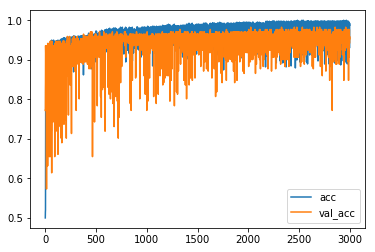

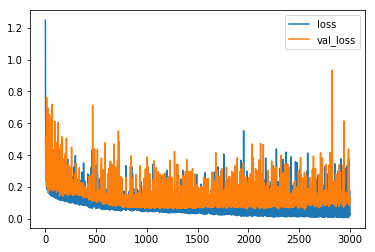

513


In [95]:
plt.plot(history1.history['acc'], label='acc')
plt.plot(history1.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history1.history['acc']:
    if i>0.99:
        count+=1
print(count)

In [154]:
model4.save('model4.h5')
print("Avg Training acc: ", np.mean(history1.history['acc']),"\nAvg Testing acc: ", np.mean(history1.history['val_acc']))

Avg Training acc:  0.966512562676 
Avg Testing acc:  0.938567249898


### Using 4 Sigmoid Layers and SGD optimizer

In [16]:
model7 = Sequential()
model7.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model7.add(Dense(500, activation='sigmoid', use_bias=True))
model7.add(Dense(500, activation='sigmoid', use_bias=True))
model7.add(Dense(1, activation='sigmoid'))
keras.optimizers.SGD(lr=0.01)
#keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model7.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model7.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=False,epochs=3000, batch_size=128, verbose=0)

In [17]:
score = model7.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.311782893673
Train accuracy: 0.909547738993


In [18]:
score = model7.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.308878431718
Validation accuracy: 0.906432752372


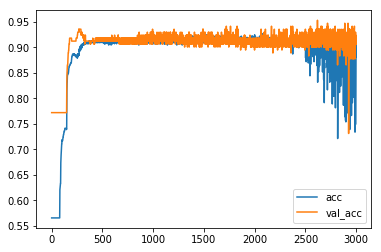

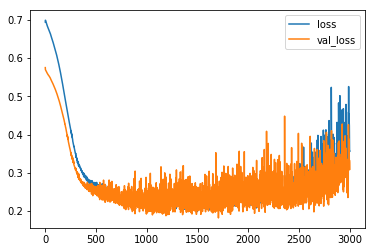

0


In [19]:
plt.plot(history2.history['acc'], label='acc')
plt.plot(history2.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
count=0
for i in history2.history['acc']:
    if i>0.99:
        count+=1
print(count)

In [20]:
model7.save('model7.h5')
print("Avg Training acc: ", np.mean(history2.history['acc']),"\nAvg Testing acc: ", np.mean(history2.history['val_acc']))

Avg Training acc:  0.892200167809 
Avg Testing acc:  0.907534117838


### Using 4 Sigmoid Layers and RMSprop optimizer with batch shuffle

In [17]:
model6 = Sequential()
model6.add(Dense(500, activation='sigmoid', use_bias=True, input_shape=(30,)))
model6.add(Dense(500, activation='sigmoid', use_bias=True))
model6.add(Dense(500, activation='sigmoid', use_bias=True))
model6.add(Dense(1, activation='sigmoid'))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model6.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = model6.fit(mat[:,1:],mat[:,0], validation_split=0.3,shuffle=True,epochs=3000, batch_size=128, verbose=0)

In [135]:
score = model6.evaluate(mat[:398,1:],mat[:398,0], verbose=0, batch_size=128)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.0827286702829
Train accuracy: 0.959798994076


In [136]:
score = model7.evaluate(mat[398:,1:],mat[398:,0], verbose=0, batch_size=128)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.266625886075
Validation accuracy: 0.92397661481
